In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [2]:
file_list = ["C:/Users/GAMING/Desktop/Score Prediction xlsx/bundesliga.xlsx", "C:/Users/GAMING/Desktop/Score Prediction xlsx/laliga.xlsx"
             , "C:/Users/GAMING/Desktop/Score Prediction xlsx/premierleague.xlsx", "C:/Users/GAMING/Desktop/Score Prediction xlsx/seriea.xlsx"]
df_list = []
for data in file_list:
    df = pd.read_excel(data)
    print(data)
    missing_values = df.isna().sum().sort_values()
    df_list.append(df)
    
common_columns = set(df_list[0].columns)
for df in df_list[1:]:
    common_columns &= set(df.columns)

# Convert to list to maintain order
common_columns = [col for col in df_list[0].columns if col in common_columns]

# Select only common columns from each dataset
dfs_common = [df[common_columns] for df in df_list]

# Concatenate the datasets
combined_df = pd.concat(dfs_common, ignore_index=True)

combined_df = pd.concat([df[common_columns] for df in df_list], ignore_index=True)
print(combined_df.shape)

missing_values = combined_df.isna().sum().sort_values()

print(missing_values.to_string())

C:/Users/GAMING/Desktop/Score Prediction xlsx/bundesliga.xlsx
C:/Users/GAMING/Desktop/Score Prediction xlsx/laliga.xlsx
C:/Users/GAMING/Desktop/Score Prediction xlsx/premierleague.xlsx
C:/Users/GAMING/Desktop/Score Prediction xlsx/seriea.xlsx
(13730, 138)
Div              6
Date             6
HomeTeam         6
AwayTeam         6
FTHG             6
FTAG             6
FTR              6
AR               7
HR               7
AY               7
HY               7
AC               7
HC               7
AF               7
AST              7
HST              7
AS               7
HS               7
HTR              7
HTAG             7
HTHG             7
HF               7
B365H            8
B365D            8
B365A            8
WHD             10
WHA             10
WHH             10
BWD             13
BWA             13
BWH             13
VCA             21
VCD             21
VCH             21
IWH             31
IWD             31
IWA             31
Bb1X2          716
BbAvH          716
BbM

In [3]:
# Removing mostly empty columns
threshold = 0.10
combined_df = combined_df.loc[:, combined_df.isnull().mean() <= threshold]
df_cleaned = combined_df.dropna(thresh=len(combined_df.columns) - 10, axis=0)
df_cleaned = df_cleaned.apply(lambda col: col.fillna(col.mean()) if col.isnull().any() else col)
print(df_cleaned.head())
print(df_cleaned.shape)

missing_values = df_cleaned.isna().sum().sort_values()

print(missing_values.to_string())

  Div      Date       HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  D1  20/08/10  Bayern Munich       Wolfsburg   2.0   1.0   H   1.0   0.0   
1  D1  21/08/10        FC Koln  Kaiserslautern   1.0   3.0   A   1.0   0.0   
2  D1  21/08/10       Freiburg        St Pauli   1.0   3.0   A   0.0   0.0   
3  D1  21/08/10        Hamburg      Schalke 04   2.0   1.0   H   0.0   0.0   
4  D1  21/08/10       Hannover   Ein Frankfurt   2.0   1.0   H   1.0   1.0   

  HTR  ...  BbMx>2.5  BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  \
0   H  ...      1.60      1.55      2.47      2.33  17.0    0.0     1.25   
1   H  ...      2.16      2.04      1.80      1.73  21.0    0.0     1.63   
2   D  ...      2.00      1.87      1.95      1.88  21.0    0.0     1.69   
3   D  ...      2.03      1.94      1.90      1.82  21.0    0.0     1.71   
4   D  ...      1.96      1.87      1.97      1.88  26.0    0.0     2.03   

   BbAvAHH  BbMxAHA  BbAvAHA  
0     1.19     5.35     4.30  
1     1.54  

In [4]:
# One hot encoding
encodings = {"H": 1, "D": 0, "A": 2}

df_cleaned['FTR'] = df_cleaned['FTR'].map(encodings)
df_cleaned['HTR'] = df_cleaned['HTR'].map(encodings)

string_columns = df_cleaned.select_dtypes(include=['object', 'string']).columns

df_cleaned = df_cleaned.drop(columns=string_columns)
betsites = ["WHH", "WHD", "WHA", "BWH", "BWD", "BWA", "IWH", "IWD", "IWA", "VCH", "VCD" , "VCA","BbMxH",
            "BbAvH","BbMxD","BbAvD","BbMxA","BbAvA","BbMx<2.5","BbMx>2.5","BbMxAHH","BbAvAHH","BbMxAHA",
            "BbAvAHA","BbAH","Bb1X2"]
df_cleaned = df_cleaned.drop(columns=betsites)
print(df_cleaned.shape)

(13013, 25)


In [5]:
# Select and print columns with string data
string_columns = df_cleaned.select_dtypes(include=['object', 'string']).columns
print("Columns with strings:", string_columns.tolist())

# Optionally, display the string data
print(df_cleaned[string_columns])

Columns with strings: []
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[13013 rows x 0 columns]


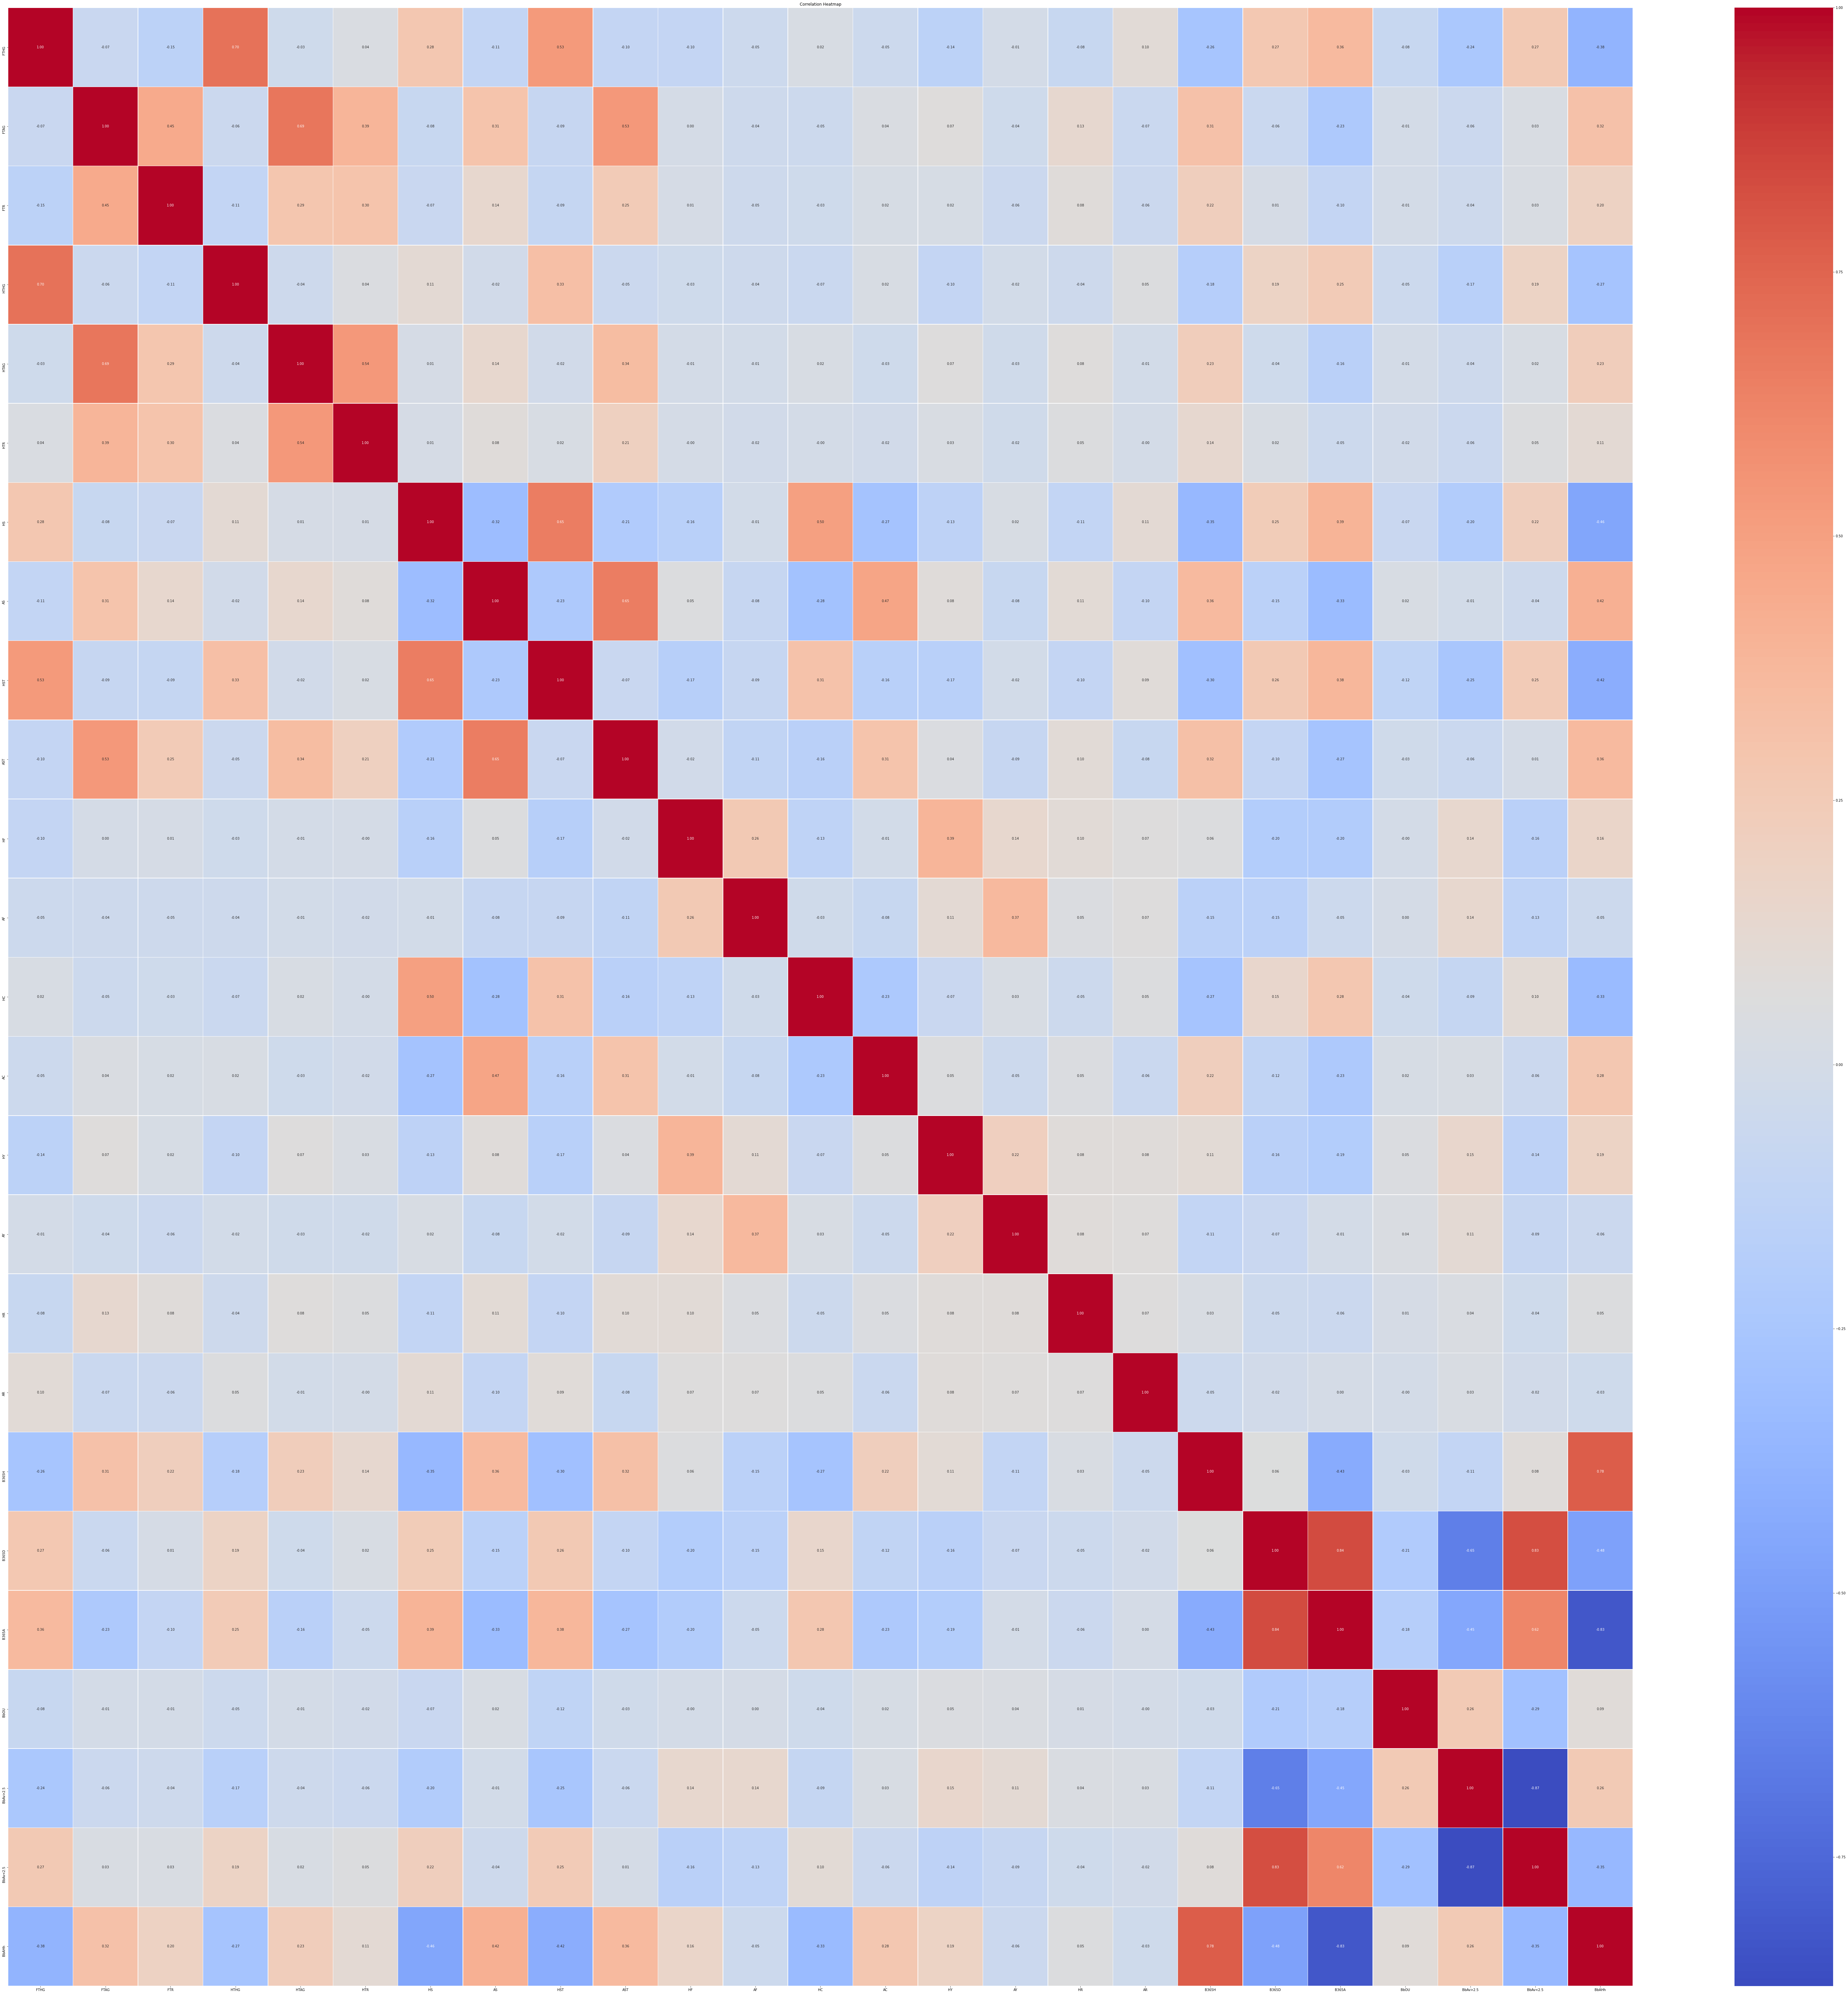

In [6]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(110, 110))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
print(df_cleaned.shape)

(13013, 25)


In [8]:
print(df_cleaned.columns)

Index(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       'B365A', 'BbOU', 'BbAv>2.5', 'BbAv<2.5', 'BbAHh'],
      dtype='object')


## Linear Regression for Score Prediction

In [9]:
X = df_cleaned.drop(columns=['FTHG', 'FTAG'])  # Features (everything except the target columns)
y = df_cleaned[['FTHG', 'FTAG']]  # Targets (Home team and Away team goals)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model 
model_home = LinearRegression()
model_home.fit(X_train, y_train['FTHG'])

model_away = LinearRegression()
model_away.fit(X_train, y_train['FTAG'])

# Prediction
y_pred_home = model_home.predict(X_test)
y_pred_away = model_away.predict(X_test)

# Combine predictions into a DataFrame
y_pred_test = pd.DataFrame({
    'FTHG': y_pred_home,
    'FTAG': y_pred_away
})

# Round predictions to the nearest integer and clip at 0 to ensure non-negative values
y_pred_test = y_pred_test.round().clip(0)

# Calculate MAE and MSE for both targets
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print(f"MAE (Test): {mae_test}")
print(f"MSE (Test): {mse_test}")

MAE (Test): 0.5751056473300038
MSE (Test): 0.7260852862082213


## Logistic Regression for Over 2.5 Goals Prediction

In [10]:
# Create a new target variable: 1 if total goals exceed 2.5, otherwise 0
df_cleaned['High_Score'] = ((df_cleaned['FTHG'] + df_cleaned['FTAG']) > 2.5).astype(int)

# Independent variables
X = df_cleaned.drop(columns=['FTHG', 'FTAG', 'High_Score'])

# New target variable (binary classification)
y = df_cleaned['High_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 79.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1221
           1       0.81      0.79      0.80      1382

    accuracy                           0.79      2603
   macro avg       0.79      0.79      0.79      2603
weighted avg       0.80      0.79      0.79      2603

Confusion Matrix:
[[ 972  249]
 [ 286 1096]]


## Backpropagation with Adam Optimizer Score Prediction

In [11]:
# Preprocessing
X = df_cleaned.drop(columns=['FTHG', 'FTAG'])  # Features (drop target columns)
y = df_cleaned[['FTHG', 'FTAG']]              # Targets

# Handle categorical data (if any) and scale numerical data
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # Output layer for FTHG and FTAG
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callback to print predictions in each epoch
class RoundClipCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        predictions = model.predict(X_test, verbose=0)
        rounded_predictions = np.clip(np.round(predictions), 0, None)  

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[RoundClipCallback()]  # Add custom callback
)


# Predict with rounding and clipping
predictions = model.predict(X_test)
predictions = np.clip(np.round(predictions), 0, None)  # Round to nearest integer and set negatives to 0
print("Final Predictions (Rounded and Clipped):")
print(predictions)
loss = np.mean(np.square(y_test - predictions))

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - predictions))

# Print results
print(f"Test Loss (MSE): {loss}", f"  Test Mean Absolute Error (MAE): {mae}")



Epoch 1/20
261/261 [==============================] - 1s 3ms/step - loss: 0.7318 - mae: 0.6339 - val_loss: 0.4499 - val_mae: 0.5075
Epoch 2/20
261/261 [==============================] - 0s 2ms/step - loss: 0.3957 - mae: 0.4799 - val_loss: 0.3676 - val_mae: 0.4518
Epoch 3/20
261/261 [==============================] - 0s 2ms/step - loss: 0.3300 - mae: 0.4307 - val_loss: 0.3279 - val_mae: 0.4248
Epoch 4/20
261/261 [==============================] - 0s 2ms/step - loss: 0.3028 - mae: 0.4101 - val_loss: 0.3184 - val_mae: 0.4200
Epoch 5/20
261/261 [==============================] - 0s 2ms/step - loss: 0.2912 - mae: 0.3989 - val_loss: 0.3136 - val_mae: 0.4093
Epoch 6/20
261/261 [==============================] - 0s 2ms/step - loss: 0.2840 - mae: 0.3918 - val_loss: 0.2986 - val_mae: 0.4021
Epoch 7/20
261/261 [==============================] - 0s 2ms/step - loss: 0.2767 - mae: 0.3849 - val_loss: 0.3002 - val_mae: 0.4046
Epoch 8/20
261/261 [==============================] - 0s 2ms/step - loss: 0.

## Early Stopping for Best Epoch (Backpropagation)

Epoch 1/100
261/261 [==============================] - 1s 2ms/step - loss: 0.7314 - mae: 0.6325 - val_loss: 0.4275 - val_mae: 0.5005
Epoch 2/100
261/261 [==============================] - 0s 1ms/step - loss: 0.3838 - mae: 0.4697 - val_loss: 0.3504 - val_mae: 0.4416
Epoch 3/100
261/261 [==============================] - 0s 1ms/step - loss: 0.3259 - mae: 0.4272 - val_loss: 0.3155 - val_mae: 0.4141
Epoch 4/100
261/261 [==============================] - 0s 1ms/step - loss: 0.3038 - mae: 0.4083 - val_loss: 0.3095 - val_mae: 0.4098
Epoch 5/100
261/261 [==============================] - 0s 1ms/step - loss: 0.2902 - mae: 0.3964 - val_loss: 0.2956 - val_mae: 0.3951
Epoch 6/100
261/261 [==============================] - 0s 1ms/step - loss: 0.2824 - mae: 0.3886 - val_loss: 0.2939 - val_mae: 0.3904
Epoch 7/100
261/261 [==============================] - 0s 1ms/step - loss: 0.2785 - mae: 0.3847 - val_loss: 0.2889 - val_mae: 0.3895
Epoch 8/100
261/261 [==============================] - 0s 1ms/step - 

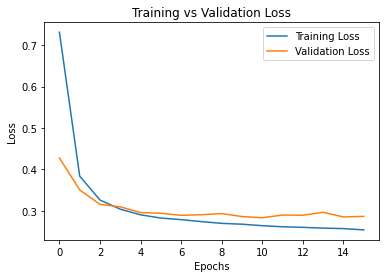

In [12]:
# Preprocessing
X = df_cleaned.drop(columns=['FTHG', 'FTAG'])  # Features (drop target columns)
y = df_cleaned[['FTHG', 'FTAG']]               # Targets

# Handle categorical data (if any) and scale numerical data
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # Output layer for FTHG and FTAG
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict
predictions = model.predict(X_test)
print(predictions)

# Find the best epoch
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best epoch: {best_epoch}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


## ANN (Artificial Neural Network) Over 2.5 Goals Prediction

In [13]:
df_cleaned['High_Score'] = ((df_cleaned['FTHG'] + df_cleaned['FTAG']) > 2.5).astype(int)

X = df_cleaned.drop(columns=['FTHG', 'FTAG', 'High_Score'])
y = df_cleaned['High_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=22, batch_size=32, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/22
326/326 [==============================] - 1s 921us/step - loss: 0.5346 - accuracy: 0.7158
Epoch 2/22
326/326 [==============================] - 0s 916us/step - loss: 0.4433 - accuracy: 0.7833
Epoch 3/22
326/326 [==============================] - 0s 905us/step - loss: 0.4300 - accuracy: 0.7885
Epoch 4/22
326/326 [==============================] - 0s 913us/step - loss: 0.4225 - accuracy: 0.7916
Epoch 5/22
326/326 [==============================] - 0s 999us/step - loss: 0.4169 - accuracy: 0.7939
Epoch 6/22
326/326 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.7943
Epoch 7/22
326/326 [==============================] - 0s 936us/step - loss: 0.4101 - accuracy: 0.7986
Epoch 8/22
326/326 [==============================] - 0s 921us/step - loss: 0.4061 - accuracy: 0.7991
Epoch 9/22
326/326 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8001
Epoch 10/22
326/326 [==============================] - 0s 982us/step - loss: 0.4013 - 

## Early Stopping for Best Epoch (ANN)

Epoch 1/100
261/261 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7135 - val_loss: 0.4738 - val_accuracy: 0.7622
Epoch 2/100
261/261 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7849 - val_loss: 0.4469 - val_accuracy: 0.7743
Epoch 3/100
261/261 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7869 - val_loss: 0.4358 - val_accuracy: 0.7848
Epoch 4/100
261/261 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.7914 - val_loss: 0.4325 - val_accuracy: 0.7915
Epoch 5/100
261/261 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.7965 - val_loss: 0.4274 - val_accuracy: 0.7877
Epoch 6/100
261/261 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.7948 - val_loss: 0.4284 - val_accuracy: 0.7915
Epoch 7/100
261/261 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8016 - val_loss: 0.4317 - val_accuracy: 0.7882

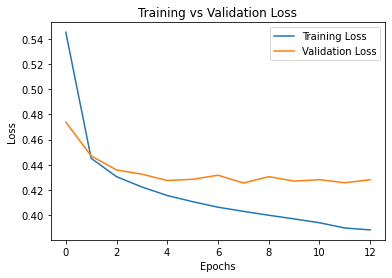

In [14]:
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_full.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train_full, y_train_full,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Find the best epoch
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best epoch: {best_epoch}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


## Naive Bayes for Score Prediction

In [16]:
# Selecting features and target columns
X = df_cleaned.drop(columns=['FTHG', 'FTAG'])  # Features (everything except the target columns)
y = df_cleaned[['FTHG', 'FTAG']]  # Targets (Home team and Away team goals)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
# GaussianNB expects 1D target arrays, so we fit separately for each target
model_fthg = GaussianNB()
model_ftag = GaussianNB()

model_fthg.fit(X_train, y_train['FTHG'])
model_ftag.fit(X_train, y_train['FTAG'])

# Predict both Home and Away team goals on test data
y_pred_fthg = model_fthg.predict(X_test)
y_pred_ftag = model_ftag.predict(X_test)

# Combine predictions into a DataFrame
y_pred_test = pd.DataFrame({
    'FTHG': y_pred_fthg,
    'FTAG': y_pred_ftag
})

# Round predictions to the nearest integer and clip at 0 to ensure non-negative values
y_pred_test = y_pred_test.round().clip(0)

# Calculate MAE and MSE for both targets
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print(f"MAE (Test): {mae_test}")
print(f"MSE (Test): {mse_test}")

MAE (Test): 0.9053015751056473
MSE (Test): 1.9848252016903571


## Naive Bayes for Over 2.5 Goals Prediction 

In [15]:
df_cleaned['High_Score'] = ((df_cleaned['FTHG'] + df_cleaned['FTAG']) > 2.5).astype(int)

# Selecting features and target columns
X = df_cleaned.drop(columns=['FTHG', 'FTAG', 'High_Score'])
y = df_cleaned['High_Score']


# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Naive Bayes model
model = GaussianNB()

# Train Model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# View the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# View the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 71.96%
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1221
           1       0.80      0.63      0.71      1382

    accuracy                           0.72      2603
   macro avg       0.73      0.73      0.72      2603
weighted avg       0.73      0.72      0.72      2603

Confusion Matrix:
[[996 225]
 [505 877]]


## Decision Tree for Score Prediction

In [17]:

# Selecting features and target columns
X = df_cleaned.drop(columns=['FTHG', 'FTAG'])  # Features (everything except the target columns)
y = df_cleaned[['FTHG', 'FTAG']]  # Targets (Home team and Away team goals)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],    # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'criterion': ['mse', 'friedman_mse', 'poisson']  # The function to measure the quality of a split
}

# Initialize GridSearchCV with cross-validation (CV = 5) to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the final model using the best hyperparameters
best_model = grid_search.best_estimator_

# Predict both Home and Away team goals on test data
y_pred_test = best_model.predict(X_test)

# Round predictions to the nearest integer and clip at 0 to ensure non-negative values
y_pred_test = y_pred_test.round().clip(0)

# Calculate MAE for both home and away predictions
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate MSE for both home and away predictions
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results for MAE and MSE
print(f"MAE (Test): {mae_test}")
print(f"MSE (Test): {mse_test}")


Best hyperparameters: {'criterion': 'mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
MAE (Test): 0.33653476757587397
MSE (Test): 0.4006915097963888


## Decision Tree for Over 2.5 Goals Prediction

In [18]:
# Assuming df_cleaned is already loaded and contains the 'High_Score' column
df_cleaned['High_Score'] = ((df_cleaned['FTHG'] + df_cleaned['FTAG']) > 2.5).astype(int)

# Features (excluding the target column 'High_Score')
X = df_cleaned.drop(columns=['High_Score', 'FTHG', 'FTAG'])  # Features (everything except the target column)
y = df_cleaned['High_Score']  # Target: High_Score (binary classification)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],    # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']  # The function to measure the quality of a split
}

# Initialize GridSearchCV with cross-validation (CV = 5) to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the final model using the best hyperparameters
best_model = grid_search.best_estimator_

# Predict the target (High_Score) on train and test data
y_pred_test = best_model.predict(X_test)

# Calculate accuracy for both train and test
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print the results
print(f"Accuracy: {accuracy_test * 100:.2f}%")
print("Confusion Matrix (Test):")
print(conf_matrix)

# View the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 77.41%
Confusion Matrix (Test):
[[ 965  256]
 [ 332 1050]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1221
           1       0.80      0.76      0.78      1382

    accuracy                           0.77      2603
   macro avg       0.77      0.78      0.77      2603
weighted avg       0.78      0.77      0.77      2603

